In [32]:
import pandas as pd
import numpy as np
import quandl as Quandl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
Quandl.ApiConfig.api_key = "JGpzYWkKrxkHXmU-gWJW"

In [3]:
gdp_df = Quandl.get("FRED/GDP",)
gdp_df.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

In [5]:
sp_500_df = pd.read_csv(r"C:\Users\silvi\Project2\impacts-of-covid19\Data\^GSPC (S&P 500 max).csv")

In [6]:
sp_500_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [7]:
sp_500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23236 entries, 0 to 23235
Data columns (total 7 columns):
Date         23236 non-null object
Open         23236 non-null float64
High         23236 non-null float64
Low          23236 non-null float64
Close        23236 non-null float64
Adj Close    23236 non-null float64
Volume       23236 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [8]:
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])

In [9]:
pct_move = sp_500_df['Adj Close'].pct_change()
sp_500_df = sp_500_df.assign(percentage_move = pct_move)
sp_500_df['Date'] = pd.to_datetime(sp_500_df['Date'])

sp_500_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268


In [10]:
sp_500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23236 entries, 0 to 23235
Data columns (total 8 columns):
Date               23236 non-null datetime64[ns]
Open               23236 non-null float64
High               23236 non-null float64
Low                23236 non-null float64
Close              23236 non-null float64
Adj Close          23236 non-null float64
Volume             23236 non-null int64
percentage_move    23235 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.4 MB


In [43]:
#The Great Depression
start_date = '1929-09-09'
end_date = '1930-01-20'
#t+1 of start_date
ref_value = 31.830000

great_depression = (sp_500_df['Date']>=start_date) & (sp_500_df['Date'] <= end_date)
great_depression_df = sp_500_df.loc[great_depression]
great_depression_df = great_depression_df.assign(percentage_move = ((sp_500_df['Adj Close']-ref_value)/ref_value)*100, time_in_days = np.arange(len(great_depression_df)))

great_depression_df

,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move,time_in_days
423,1929-09-09,31.670000,31.670000,31.670000,31.670000,31.670000,0,-0.502670,0
424,1929-09-10,31.100000,31.100000,31.100000,31.100000,31.100000,0,-2.293434,1
425,1929-09-11,31.530001,31.530001,31.530001,31.530001,31.530001,0,-0.942504,2
426,1929-09-12,31.170000,31.170000,31.170000,31.170000,31.170000,0,-2.073516,3
427,1929-09-13,31.379999,31.379999,31.379999,31.379999,31.379999,0,-1.413764,4
...,...,...,...,...,...,...,...,...,...
508,1930-01-14,21.559999,21.559999,21.559999,21.559999,21.559999,0,-32.265162,85
509,1930-01-15,21.650000,21.650000,21.650000,21.650000,21.650000,0,-31.982407,86
510,1930-01-16,21.500000,21.500000,21.500000,21.500000,21.500000,0,-32.453660,87
511,1930-01-17,21.309999,21.309999,21.309999,21.309999,21.309999,0,-33.050584,88


In [12]:
great_depression_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 423 to 512
Data columns (total 9 columns):
Date               90 non-null datetime64[ns]
Open               90 non-null float64
High               90 non-null float64
Low                90 non-null float64
Close              90 non-null float64
Adj Close          90 non-null float64
Volume             90 non-null int64
percentage_move    90 non-null float64
time_in_days       90 non-null int32
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 6.7 KB


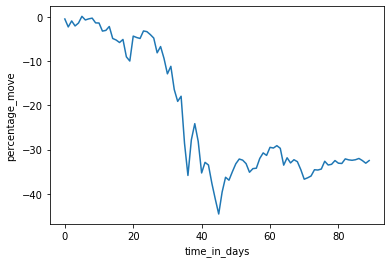

In [13]:
sns.lineplot(data=great_depression_df,
            x = 'time_in_days',
            y = 'percentage_move')

In [44]:
#Black Monday

start_date_BM = '1987-10-19'
end_date_BM = '1988-02-25'
#t+1 of start_date_BM
ref_value_BM = 282.700012

black_monday = (sp_500_df['Date']>=start_date_BM) & (sp_500_df['Date'] <= end_date_BM)
black_monday_df = sp_500_df.loc[black_monday]
black_monday_df = black_monday_df.assign(percentage_move = ((sp_500_df['Adj Close']-ref_value_BM)/ref_value_BM)*100, time_in_days = np.arange(len(black_monday_df)))

black_monday_df

,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move,time_in_days
14993,1987-10-19,282.700012,282.700012,224.830002,224.839996,224.839996,604300000,-20.466931,0
14994,1987-10-20,225.059998,245.619995,216.460007,236.830002,236.830002,608100000,-16.225684,1
14995,1987-10-21,236.830002,259.269989,236.830002,258.380005,258.380005,449600000,-8.602761,2
14996,1987-10-22,258.239990,258.380005,242.990005,248.250000,248.250000,392200000,-12.186067,3
14997,1987-10-23,248.289993,250.699997,242.759995,248.220001,248.220001,245600000,-12.196678,4
...,...,...,...,...,...,...,...,...,...
15078,1988-02-19,257.899994,261.609985,257.619995,261.609985,261.609985,180300000,-7.460214,85
15079,1988-02-22,261.600006,266.059998,260.880005,265.640015,265.640015,178930000,-6.034664,86
15080,1988-02-23,265.619995,266.119995,263.109985,265.019989,265.019989,192260000,-6.253987,87
15081,1988-02-24,265.010010,266.250000,263.869995,264.429993,264.429993,212730000,-6.462688,88


(-20, 0)

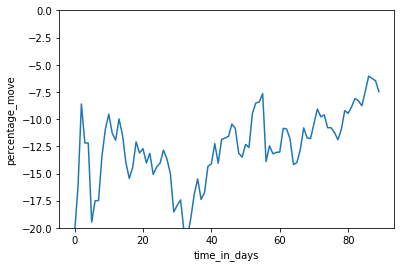

In [15]:
dot_com_fig = sns.lineplot(data=black_monday_df,
              x = 'time_in_days',
              y = 'percentage_move')
axes = dot_com_fig.axes
axes.set_ylim(-20,0)

In [45]:
#dot-com crash

start_date_dc='2000-03-27'
end_date_dc = '2000-08-02'

#t+1 of start_date_dc
ref_value_dc=1527.459961

dot_com = (sp_500_df['Date']>=start_date_dc) & (sp_500_df['Date'] <= end_date_dc)
dot_com_df = sp_500_df.loc[dot_com]
dot_com_df = dot_com_df.assign(percentage_move = ((sp_500_df['Adj Close']-ref_value_dc)/ref_value_dc)*100, time_in_days = np.arange(len(black_monday_df)))

dot_com_df

,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move,time_in_days
18136,2000-03-27,1527.459961,1534.630005,1518.459961,1523.859985,1523.859985,901000000,-0.235684,0
18137,2000-03-28,1523.859985,1527.359985,1507.089966,1507.729980,1507.729980,959100000,-1.291686,1
18138,2000-03-29,1507.729980,1521.449951,1497.449951,1508.520020,1508.520020,1061900000,-1.239963,2
18139,2000-03-30,1508.520020,1517.380005,1474.630005,1487.920044,1487.920044,1193400000,-2.588606,3
18140,2000-03-31,1487.920044,1519.810059,1484.380005,1498.579956,1498.579956,1227400000,-1.890721,4
...,...,...,...,...,...,...,...,...,...
18221,2000-07-27,1452.420044,1464.910034,1445.329956,1449.619995,1449.619995,1156400000,-5.096040,85
18222,2000-07-28,1449.619995,1456.680054,1413.890015,1419.890015,1419.890015,980000000,-7.042407,86
18223,2000-07-31,1419.890015,1437.650024,1418.709961,1430.829956,1430.829956,952600000,-6.326189,87
18224,2000-08-01,1430.829956,1443.540039,1428.959961,1438.099976,1438.099976,938700000,-5.850234,88


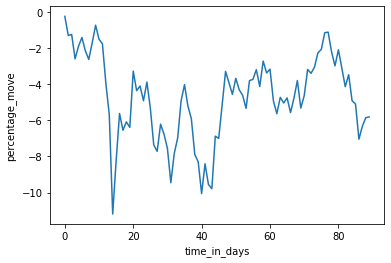

In [17]:
sns.lineplot(data=dot_com_df,
            x = 'time_in_days',
            y = 'percentage_move')

In [18]:
#The Great Recession

start_date_GR='2007-10-15'
end_date_GR = '2008-02-22'

#t+1 of start_date_GR
ref_value_GR = 1561.800049

great_recession = (sp_500_df['Date']>=start_date_GR) & (sp_500_df['Date'] <= end_date_GR)
great_recession_df = sp_500_df.loc[great_recession]
great_recession_df = great_recession_df.assign(percentage_move = ((sp_500_df['Adj Close']-ref_value_GR)/ref_value_GR)*100, time_in_days = np.arange(len(great_recession_df)))

great_recession_df

,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move,time_in_days
20034,2007-10-15,1562.250000,1564.739990,1540.810059,1548.709961,1548.709961,3139290000,-0.838141,0
20035,2007-10-16,1547.810059,1547.810059,1536.290039,1538.530029,1538.530029,3234560000,-1.489949,1
20036,2007-10-17,1544.439941,1550.660034,1526.010010,1541.239990,1541.239990,3638070000,-1.316433,2
20037,2007-10-18,1539.290039,1542.790039,1531.760010,1540.079956,1540.079956,3203210000,-1.390709,3
20038,2007-10-19,1540.000000,1540.000000,1500.260010,1500.630005,1500.630005,4160970000,-3.916637,4
...,...,...,...,...,...,...,...,...,...
20119,2008-02-15,1347.520020,1350.000000,1338.130005,1349.989990,1349.989990,3583300000,-13.561919,85
20120,2008-02-19,1355.859985,1367.280029,1345.050049,1348.780029,1348.780029,3613550000,-13.639391,86
20121,2008-02-20,1348.390015,1363.709961,1336.550049,1360.030029,1360.030029,3870520000,-12.919069,87
20122,2008-02-21,1362.209961,1367.939941,1339.339966,1342.530029,1342.530029,3696660000,-14.039571,88


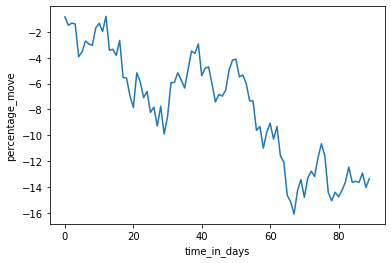

In [19]:
sns.lineplot(data=great_recession_df,
            x = 'time_in_days',
            y = 'percentage_move')

In [46]:
# The Coronavirus Crash

start_date_CV='2020-02-24'
end_date_CV = '2020-06-29'

#t+1 of start_date_CV
ref_value_CV = 3337.750000

corona_virus = (sp_500_df['Date']>=start_date_CV) & (sp_500_df['Date'] <= end_date_CV)
corona_virus_df = sp_500_df.loc[corona_virus]
corona_virus_df = corona_virus_df.assign(percentage_move = ((sp_500_df['Adj Close']-ref_value_CV)/ref_value_CV)*100, time_in_days = np.arange(len(corona_virus_df)))

corona_virus_df

,Date,Open,High,Low,Close,Adj Close,Volume,percentage_move,time_in_days
23144,2020-02-24,3257.610107,3259.810059,3214.649902,3225.889893,3225.889893,4842960000,-3.351363,0
23145,2020-02-25,3238.939941,3246.989990,3118.770020,3128.209961,3128.209961,5591510000,-6.277883,1
23146,2020-02-26,3139.899902,3182.510010,3108.989990,3116.389893,3116.389893,5478110000,-6.632016,2
23147,2020-02-27,3062.540039,3097.070068,2977.389893,2978.760010,2978.760010,7058840000,-10.755449,3
23148,2020-02-28,2916.899902,2959.719971,2855.840088,2954.219971,2954.219971,8563850000,-11.490676,4
...,...,...,...,...,...,...,...,...,...
23228,2020-06-23,3138.699951,3154.899902,3127.120117,3131.290039,3131.290039,4704830000,-6.185603,84
23229,2020-06-24,3114.399902,3115.010010,3032.129883,3050.330078,3050.330078,5587200000,-8.611188,85
23230,2020-06-25,3046.600098,3086.250000,3024.010010,3083.760010,3083.760010,4815420000,-7.609617,86
23231,2020-06-26,3073.199951,3073.729980,3004.629883,3009.050049,3009.050049,8098120000,-9.847950,87


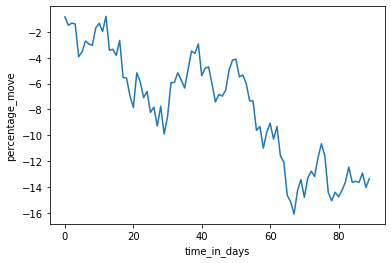

In [21]:
sns.lineplot(data=great_recession_df,
            x = 'time_in_days',
            y = 'percentage_move')

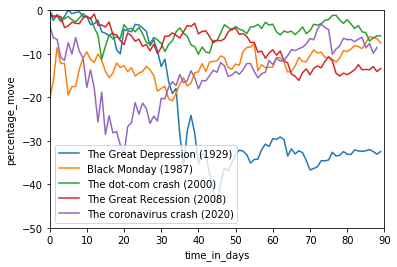

In [22]:
for data in [great_depression_df, black_monday_df, dot_com_df, great_recession_df, corona_virus_df]:
    sns.lineplot(data['time_in_days'],
                 data['percentage_move'])
    
plt.xlim(0,90)
plt.ylim(-50,0)

plt.legend(labels=['The Great Depression (1929)', 'Black Monday (1987)', 'The dot-com crash (2000)', 'The Great Recession (2008)', 'The coronavirus crash (2020)'])

In [23]:
#Days until recovery

date = ['1957', '1962', '1966', '1970', '1973', '1982', '1987', '2001', '2008']
dys_high_20pctfall = [444, 232, 236, 416, 320, 451, 55, 353, 294]
dys_recover = [339, 394, 212, 774, 2423, 253, 645, 2269, 1702]
maximum_loss = [0.21, 0.28, 0.22, 0.36, 0.48, 0.27, 0.34, 0.49, 0.57]

dict = {'Date': date, 'Days from all time high to 20% fall': dys_high_20pctfall, 'Days it took to recover': dys_recover, 'Total % drop of the S&P': maximum_loss}

In [24]:
df = pd.DataFrame(dict)

In [25]:
df

,Date,Days from all time high to 20% fall,Days it took to recover,Total % drop of the S&P
0,1957,444,339,0.21
1,1962,232,394,0.28
2,1966,236,212,0.22
3,1970,416,774,0.36
4,1973,320,2423,0.48
5,1982,451,253,0.27
6,1987,55,645,0.34
7,2001,353,2269,0.49
8,2008,294,1702,0.57


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
Date                                   9 non-null object
Days from all time high to 20% fall    9 non-null int64
Days it took to recover                9 non-null int64
Total % drop of the S&P                9 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 416.0+ bytes


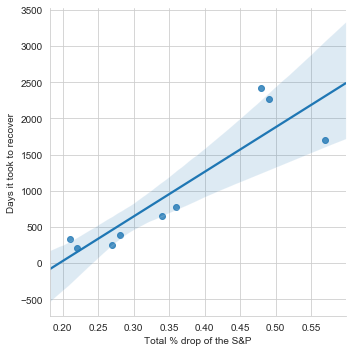

In [27]:
sns.set_style('whitegrid') 
sns.lmplot(x ='Total % drop of the S&P', y ='Days it took to recover', data = df) 

In [28]:
df = df.assign(const=1)

In [29]:
df.head()

,Date,Days from all time high to 20% fall,Days it took to recover,Total % drop of the S&P,const
0,1957,444,339,0.21,1
1,1962,232,394,0.28,1
2,1966,236,212,0.22,1
3,1970,416,774,0.36,1
4,1973,320,2423,0.48,1


In [33]:
X = df[["const", "Total % drop of the S&P"]]
y = df["Days it took to recover"]

lin_reg= sm.OLS(y, X)
results = lin_reg.fit()

In [34]:
results.summary()

C:\Users\silvi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Days it took to recover   R-squared:                       0.799
Model:                                 OLS   Adj. R-squared:                  0.770
Method:                      Least Squares   F-statistic:                     27.82
Date:                     Tue, 07 Jul 2020   Prob (F-statistic):            0.00116
Time:                             19:48:33   Log-Likelihood:                -66.108
No. Observations:                        9   AIC:                             136.2
Df Residuals:                            7   BIC:                             136.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1203.0787    441.283     -2.726      0.029   -2246.547    -159.610
Total % drop of the S&P  6161.0897   1168.123      5.274      0.001    3398.919    8923.261
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.379
Skew:                           0.304   Prob(JB):                        0.827
Kurtosis:                       2.200   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
from sklearn.linear_model import LinearRegression

X = df[["const", "Total % drop of the S&P"]]
y = df["Days it took to recover"]

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print (model.intercept_, model.coef_)

-1203.078744123572 [   0.         6161.08965749]
